In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
df = pd.read_csv('20220801_book_updates.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818336 entries, 0 to 818335
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   COLLECTION_TIME  818336 non-null  object 
 1   MESSAGE_ID       818336 non-null  int64  
 2   MESSAGE_TYPE     818336 non-null  object 
 3   SYMBOL           818336 non-null  object 
 4   BID_PRICE_1      818336 non-null  float64
 5   BID_SIZE_1       818336 non-null  int64  
 6   BID_PRICE_2      818336 non-null  float64
 7   BID_SIZE_2       818336 non-null  int64  
 8   BID_PRICE_3      818336 non-null  float64
 9   BID_SIZE_3       818336 non-null  int64  
 10  ASK_PRICE_1      818336 non-null  float64
 11  ASK_SIZE_1       818336 non-null  int64  
 12  ASK_PRICE_2      818336 non-null  float64
 13  ASK_SIZE_2       818336 non-null  int64  
 14  ASK_PRICE_3      818336 non-null  float64
 15  ASK_SIZE_3       818336 non-null  int64  
dtypes: float64(6), int64(7), object(3)
mem

In [3]:
print(df.describe())

         MESSAGE_ID    BID_PRICE_1     BID_SIZE_1    BID_PRICE_2  \
count  8.183360e+05  818336.000000  818336.000000  818336.000000   
mean   6.537177e+07     411.088418     135.469285     411.044546   
std    3.912710e+07       1.096272     143.064345       1.166364   
min    3.262820e+05     385.000000       1.000000     380.000000   
25%    3.071225e+07     410.310000     100.000000     410.260000   
50%    6.654599e+07     411.040000     100.000000     411.000000   
75%    9.740168e+07     411.950000     100.000000     411.910000   
max    1.364028e+08     413.390000    3000.000000     413.350000   

          BID_SIZE_2    BID_PRICE_3     BID_SIZE_3    ASK_PRICE_1  \
count  818336.000000  818336.000000  818336.000000  818336.000000   
mean      114.700944     410.940542     114.189542     411.210125   
std        87.107088       1.741004     130.150594       1.083086   
min         1.000000     327.310000       1.000000     408.420000   
25%       100.000000     410.220000     10

In [4]:
print(df.head(5))

                 COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL  BID_PRICE_1  \
0  2022-08-01 13:30:00.172841984      326282   BID_UPDATE    SPY       409.03   
1  2022-08-01 13:30:00.173193984      326337   BID_UPDATE    SPY       409.03   
2  2022-08-01 13:30:00.175386112      326589   ASK_UPDATE    SPY       409.03   
3  2022-08-01 13:30:00.175386112      326613   ASK_UPDATE    SPY       409.03   
4  2022-08-01 13:30:00.176423936      326726   ASK_UPDATE    SPY       409.03   

   BID_SIZE_1  BID_PRICE_2  BID_SIZE_2  BID_PRICE_3  BID_SIZE_3  ASK_PRICE_1  \
0         100       408.99         100       327.31         100       409.17   
1         100       409.00         100       408.99         100       409.17   
2         100       409.00         100       408.99         100       409.15   
3         100       409.00         100       408.99         100       409.17   
4         100       409.00         100       408.99         100       409.17   

   ASK_SIZE_1  ASK_PRICE_2  ASK_

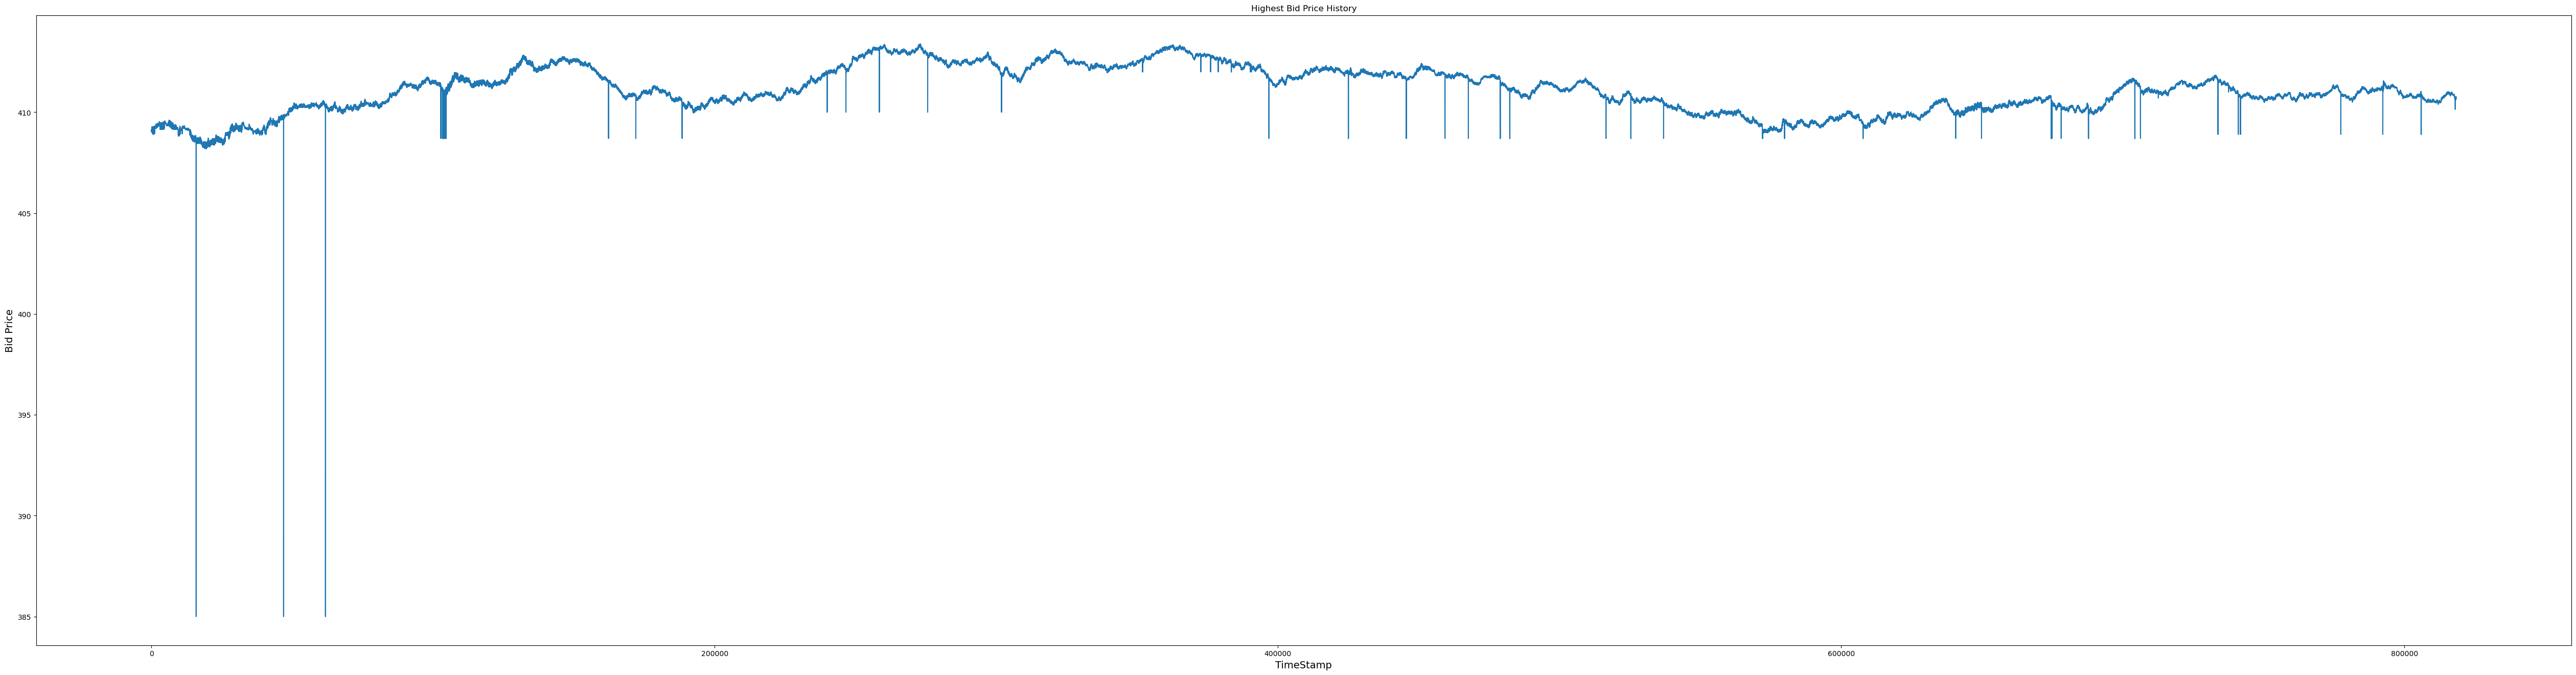

In [5]:

plt.figure(figsize=(64, 16))
plt.title("Highest Bid Price History")
plt.plot(df.index, df["BID_PRICE_1"])

plt.xlabel("TimeStamp", fontsize=14,)
plt.ylabel("Bid Price", fontsize=14)
plt.show()

In [6]:
highest_bid_price = df.filter(["BID_PRICE_1"])

highest_bid_price_array = highest_bid_price.values
highest_bid_price_array

array([[409.03],
       [409.03],
       [409.03],
       ...,
       [410.68],
       [410.68],
       [410.67]])

array([[<Axes: title={'center': 'BID_PRICE_1'}>]], dtype=object)

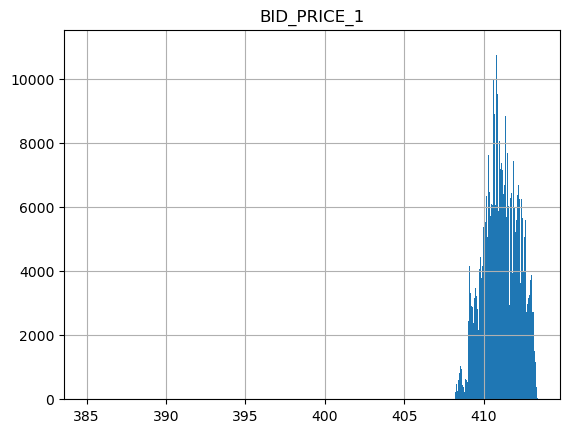

In [7]:
highest_bid_price.hist(bins=1000)

In [8]:
#Normalize the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(highest_bid_price)
minmax_scaled_data

array([[0.8464248 ],
       [0.8464248 ],
       [0.8464248 ],
       ...,
       [0.90454385],
       [0.90454385],
       [0.90419162]])

In [9]:
# Create X_train and y_train
# Using the previous 60 data to predict the next one
X_train = []
Y_train = []
for i in range(60, len(minmax_scaled_data)): #Starting from 60 because we need 60 previous data to predict the next one
    X_train.append(minmax_scaled_data[i - 60 : i, 0]) #Get the previous 60 data
    Y_train.append(minmax_scaled_data[i, 0]) #Get the next data`
print(X_train[0])
print(Y_train[0])

[0.8464248  0.8464248  0.8464248  0.8464248  0.8464248  0.8464248
 0.8464248  0.8464248  0.84677703 0.84677703 0.8464248  0.8464248
 0.84677703 0.85065164 0.85065164 0.85065164 0.85065164 0.85065164
 0.84677703 0.84677703 0.84677703 0.85065164 0.85065164 0.85065164
 0.85065164 0.85065164 0.85065164 0.85065164 0.85065164 0.85065164
 0.85065164 0.85065164 0.85065164 0.8464248  0.84677703 0.85065164
 0.85065164 0.85065164 0.85065164 0.85065164 0.85065164 0.85065164
 0.85065164 0.85065164 0.85065164 0.84677703 0.84677703 0.84677703
 0.84677703 0.85065164 0.85065164 0.85065164 0.85065164 0.85065164
 0.85065164 0.85065164 0.85065164 0.85065164 0.85065164 0.85065164]
0.8506516379006701


In [10]:
# Initialize the dataset
from torch.utils.data import Dataset, Subset
class PriceDataset(Dataset):
    
    def __init__(self, price_seq, pred_price):
        self.price_seq = price_seq
        self.pred_price = pred_price

    def __len__(self):
        return len(self.price_seq)
    
    def __getitem__(self, index):
        return (self.price_seq[index],  self.pred_price[index])
    
#original_dataset = PriceDataset(close_price_array)

minmax_dataset = PriceDataset(X_train, Y_train)

#standard_dataset = PriceDataset(standard_scaled_data)
print('Size of dataset:', len(minmax_dataset))

Size of dataset: 818276


In [11]:
# Split the dataset into training, validation, and test sets
from torch.utils.data.dataset import random_split

# Calculate the sizes of the splits
train_size = int(0.8 * len(minmax_dataset))
val_size = int(0.1 * len(minmax_dataset ))
test_size = len(minmax_dataset ) - train_size - val_size

# Create indices for the splits
indices = list(range(len(minmax_dataset)))
train_indices = indices[:train_size]
val_indices = indices[train_size:(train_size + val_size)]
test_indices = indices[(train_size + val_size):]

#train_set, val_set, test_set = Subset(original_dataset, train_indices), Subset(original_dataset, val_indices), Subset(original_dataset, test_indices)
minmax_train_set, minmax_val_set, minmax_test_set = Subset(minmax_dataset, train_indices), Subset(minmax_dataset, val_indices ), Subset(minmax_dataset, test_indices)
#standard_train_set, standard_val_set, standard_test_set = Subset(standard_dataset, train_indices), Subset(standard_dataset, val_indices ), Subset(standard_dataset, test_indices)

print("Length of train dataset:", len(minmax_train_set))
print("Length of validation dataset:", len(minmax_val_set))
print("Length of test dataset:", len(minmax_test_set))

Length of train dataset: 654620
Length of validation dataset: 81827
Length of test dataset: 81829


In [12]:
from torch.utils.data import DataLoader

# how many samples per batch to load
batch_size = 256

# prepare dataloaders
"""train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)"""

minmax_train_loader = DataLoader(minmax_train_set, batch_size=batch_size, shuffle=True)
minmax_val_loader = DataLoader(minmax_val_set, batch_size=batch_size)
minmax_test_loader = DataLoader(minmax_test_set, batch_size=batch_size)

"""standard_train_loader = DataLoader(standard_train_set, batch_size=batch_size, shuffle=True)
standard_val_loader = DataLoader(standard_val_set, batch_size=batch_size)
standard_test_loader = DataLoader(standard_test_set, batch_size=batch_size)"""

print("# of train batches:", len(minmax_train_loader))
print("# of train batches:", len(minmax_val_loader))
print("# of test batches:", len(minmax_test_loader))

# of train batches: 2558
# of train batches: 320
# of test batches: 320


In [13]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        #print('x:', x.shape)
        #print('h0:', h0.shape)
        #print('c0:', c0.shape)
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [14]:
from sklearn.metrics import mean_squared_error
def evaluate(model, loader):
    model.eval()
    all_y_true = []
    all_y_pred = []
    for x, y in loader:
        x = x.view(x.shape[0], x.shape[1], 1)  # Reshape input tensor to have the correct dimensions
        x = x.float().to(device)
        y_pred = model(x)
        
        y_pred = minmax_scaler.inverse_transform(y_pred.to('cpu').detach().numpy().reshape(-1, 1))
        y = minmax_scaler.inverse_transform(y.to('cpu').detach().numpy().reshape(-1, 1))
        

        all_y_true.append(y[0])
        all_y_pred.append(y_pred[0])
        mse = mean_squared_error(all_y_true, all_y_pred)
    #print(f"mse: {mse:.3f}")
    return mse, all_y_true, all_y_pred

In [15]:
input_size= 1
hidden_size = 32
num_layers = 5 
output_size = 1

In [16]:
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [17]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for x, y in minmax_train_loader:
        x = x.float()  # Convert input data to torch.float32 type
        y = y.float()  # Convert target data to torch.float32 type
        x = x.view(x.shape[0], x.shape[1], 1)  # Reshape input tensor to have the correct dimensions
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()

        y_hat = model(x)

        # convert shape from [batch size, 1] to [batch size]
        y_hat = y_hat.view(y_hat.shape[0])
        loss = loss_fn(y_hat, y)
        print(loss)
        loss.backward()

        optimizer.step()

        train_loss += loss.item()
            
    train_loss = train_loss / len(minmax_train_loader)
    if epoch % 10 == 0:
        mse, _, _ = evaluate(model, minmax_val_loader)
        print('Epoch: {} \tTraining Loss: {:.6f} \tMSE: {:.6f}'.format(epoch, train_loss, mse))
    


tensor(1.0628, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0682, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0551, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0585, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0515, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0383, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0412, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0328, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0382, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0462, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0335, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0231, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0195, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0151, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0201, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0201, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1.0100, device='cuda:0', grad_fn=

KeyboardInterrupt: 

In [ ]:
mse, y_test, y_test_pred = evaluate(model, minmax_test_loader)
mse

0.0005269410677719378

In [ ]:
def baseline_model(x):
    return x[-1]

def evaluate_baseline_model(model, loader):
    all_y_true = []
    all_y_pred = []
    for x, y in loader:
        print
        y_pred = model(x)
        
        y_pred = minmax_scaler.inverse_transform(y_pred.reshape(-1, 1))
        y = minmax_scaler.inverse_transform(y.reshape(-1, 1))
        

        all_y_true.append(y[0])
        all_y_pred.append(y_pred[0])
        mse = mean_squared_error(all_y_true, all_y_pred)
    #print(f"mse: {mse:.3f}")
    return mse, all_y_true, all_y_pred
baseline_model_mse, y_test, baseline_model_y_test_pred = evaluate_baseline_model(baseline_model, minmax_test_loader)
baseline_model_mse

0.0038856249999999802

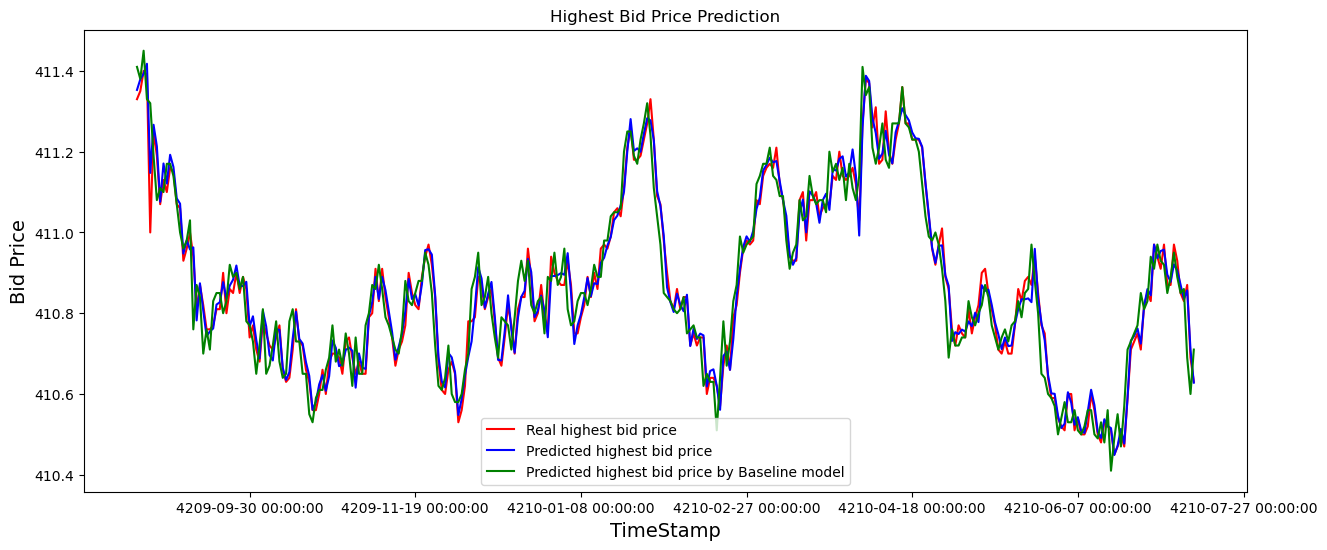

In [ ]:
import matplotlib.dates as mdates
figure, axes = plt.subplots(figsize=(15, 6))

axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

axes.plot(highest_bid_price[len(highest_bid_price)-len(y_test):].index, y_test, color = 'red', label = 'Real highest bid price')
axes.plot(highest_bid_price[len(highest_bid_price)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted highest bid price')
axes.plot(highest_bid_price[len(highest_bid_price)-len(y_test):].index, baseline_model_y_test_pred, color = 'green', label = 'Predicted highest bid price by Baseline model')

plt.title('Highest Bid Price Prediction')
plt.xlabel("TimeStamp", fontsize=14,)
plt.ylabel("Bid Price", fontsize=14)
plt.legend()
plt.savefig('bitdpred.png')
plt.show()